In [1]:
import pandas as pd

In [2]:
bills = pd.read_csv("fake_bills.csv",delimiter=";")

In [3]:
bills.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [4]:
bills.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [5]:
bills = bills.dropna()

In [6]:
bills.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


In [7]:
bills.replace({True: 1, False: 0}, inplace = True)

/tmp/ipykernel_3227/48797098.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bills.replace({True: 1, False: 0}, inplace = True)


In [8]:
bills.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [9]:
Y = bills['is_genuine']

In [10]:
Y = Y.values

In [11]:
Y

array([1, 1, 1, ..., 0, 0, 0])

In [12]:
bills.drop('is_genuine', axis=1, inplace= True)

In [13]:
X = bills.values

In [14]:
X

array([[171.81, 104.86, 104.95,   4.52,   2.89, 112.83],
       [171.46, 103.36, 103.66,   3.77,   2.99, 113.09],
       [172.69, 104.48, 103.5 ,   4.4 ,   2.94, 113.16],
       ...,
       [171.8 , 104.01, 104.12,   5.51,   3.36, 111.95],
       [172.06, 104.28, 104.06,   5.17,   3.46, 112.25],
       [171.47, 104.15, 103.82,   4.63,   3.37, 112.07]])

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_predict = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score 

In [22]:
accuracy = accuracy_score(y_test, y_predict)

In [23]:
accuracy

0.9931740614334471

In [ ]:
# Website
# Interface (UI)
# Upload money 
# Preprocessing, input -> money photo - > 6 features
# input 6 features to trained model
# trained model -> 1 or 0
# Output real (1) or fake(0) to web UI

In [ ]:
# confusion Metrics


In [25]:
from sklearn.metrics import confusion_matrix 

In [26]:
matrix = confusion_matrix(y_test, y_predict, normalize='all')

In [27]:
matrix

array([[0.33447099, 0.00341297],
       [0.00341297, 0.65870307]])

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

In [30]:
display = ConfusionMatrixDisplay(matrix)

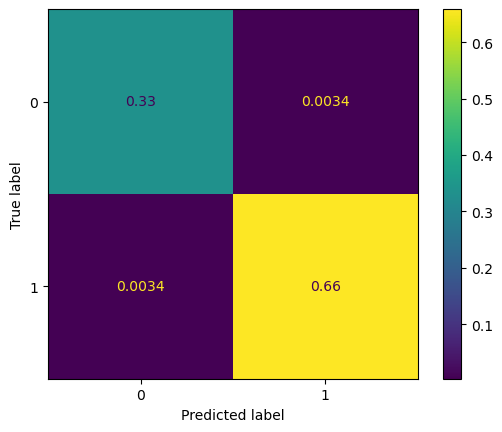

In [32]:
display.plot()

In [33]:
from sklearn.metrics import classification_report

In [34]:
report = classification_report(y_test, y_predict)

In [35]:
report

'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99        99\n           1       0.99      0.99      0.99       194\n\n    accuracy                           0.99       293\n   macro avg       0.99      0.99      0.99       293\nweighted avg       0.99      0.99      0.99       293\n'

In [36]:
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        99
           1       0.99      0.99      0.99       194

    accuracy                           0.99       293
   macro avg       0.99      0.99      0.99       293
weighted avg       0.99      0.99      0.99       293



In [37]:
model.save()

AttributeError: 'LogisticRegression' object has no attribute 'save'

In [38]:
import pickle

In [43]:
save_model = 'model.joblib'
with open(save_model, 'wb') as fp:
    pickle.dump(model, fp)

In [ ]:
# Transfer Learning